### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [21]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [142]:
def data_quality_report(df):
  return pd.DataFrame({
    'data_type': df.dtypes,
    'non_null_count': df.notnull().sum(),
    'null_count': df.isnull().sum(),
    'null_percentage': (df.isnull().sum() / len(df)) * 100,
    'unique_values': df.nunique(),
    'sample_value': df.sample().iloc[0]
  })

coupon_report = data_quality_report(data)

print(coupon_report)

for column in coupon_report[coupon_report['null_count'] > 0].index.tolist():
  print('unique values for ' + column)
  print(data[data[column].notna()][column].unique())


                     data_type  non_null_count  null_count  null_percentage  \
destination             object           12684           0         0.000000   
passanger               object           12684           0         0.000000   
weather                 object           12684           0         0.000000   
temperature              int64           12684           0         0.000000   
time                    object           12684           0         0.000000   
coupon                  object           12684           0         0.000000   
expiration              object           12684           0         0.000000   
gender                  object           12684           0         0.000000   
age                      int64           12684           0         0.000000   
maritalStatus           object           12684           0         0.000000   
has_children             int64           12684           0         0.000000   
education               object           12684      

3. Decide what to do about your missing data -- drop, replace, other...

In [37]:
## Retrieve data where at least half of values are non null
data_wo_nulls = data.dropna(thresh=int(np.ceil(len(data.columns)*0.5)))

len(data_wo_nulls)
data_wo_nulls.sample(n=25)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
10536,No Urgent Place,Kid(s),Sunny,80,10AM,Coffee House,1d,Female,50plus,Married partner,...,never,4~8,less1,1~3,1,0,0,0,1,0
11871,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,21,Married partner,...,1~3,4~8,1~3,never,1,1,0,0,1,0
5111,Home,Alone,Sunny,55,6PM,Restaurant(20-50),2h,Female,21,Single,...,never,never,gt8,less1,1,1,0,0,1,1
7091,No Urgent Place,Friend(s),Sunny,55,6PM,Carry out & Take away,1d,Male,26,Single,...,less1,gt8,4~8,less1,1,1,0,0,1,1
6044,Work,Alone,Sunny,80,7AM,Coffee House,2h,Female,26,Unmarried partner,...,less1,less1,1~3,less1,1,1,0,1,0,0
8491,Work,Alone,Rainy,55,7AM,Restaurant(20-50),1d,Female,50plus,Single,...,gt8,1~3,1~3,1~3,1,1,1,0,1,0
3133,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,50plus,Unmarried partner,...,less1,1~3,1~3,less1,1,1,0,0,1,0
1457,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,0,1,1
5390,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,26,Single,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
6912,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Male,31,Unmarried partner,...,1~3,1~3,4~8,less1,1,0,0,0,1,1


4. What proportion of the total observations chose to accept the coupon?



In [69]:
def get_total_acceptances(df):
  return df[df['Y'] == 1][['Y']].sum()

total_acceptances = get_total_acceptances(data)
total_acceptances.iloc[0]
print(f"{total_acceptances.iloc[0]} of {len(data)} total observations chose to accept the coupon")
coupon_proportion = total_acceptances.iloc[0] / len(data) * 100
print(f"A proportion of {coupon_proportion:.2f}% chose to accept the coupon")

7210 of 12684 total observations chose to accept the coupon
A proportion of 56.84% chose to accept the coupon


5. Use a bar plot to visualize the `coupon` column.

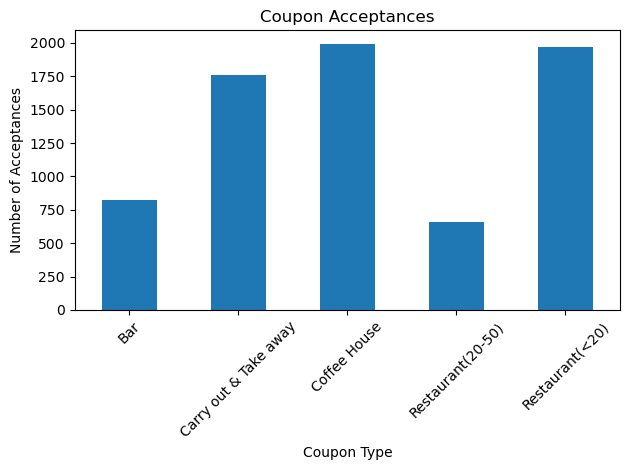

In [64]:
data.groupby('coupon')['Y'].sum().plot(kind='bar')
plt.title('Coupon Acceptances')
plt.ylabel('Number of Acceptances')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./images/coupon_acceptances.png')
plt.show()

6. Use a histogram to visualize the temperature column.

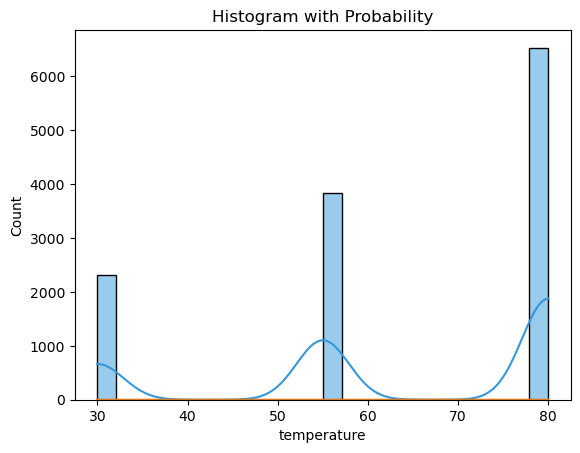

In [ ]:
sns.histplot(data, x='temperature', kde=True, color='#3498db').set_title('Histogram With Count').get_figure().savefig('images/temperature_histogram_with_count.png')

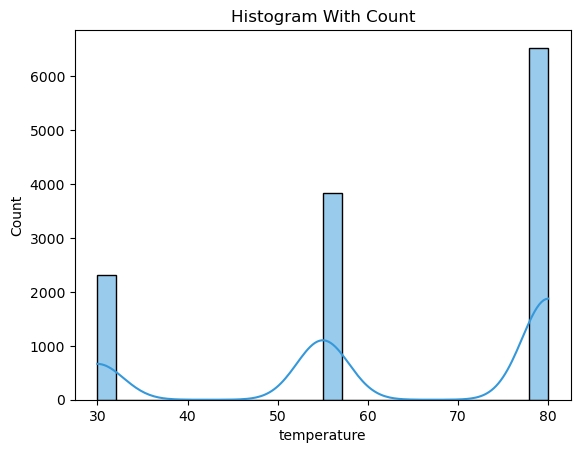

In [100]:
sns.histplot(data, x='temperature', kde=True, color='#3498db').set_title('Histogram With Count').get_figure().savefig('images/temperature_histogram_with_count.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [101]:
bar_coupon_data=data[data['coupon'] == 'Bar'].dropna(subset=['Bar'])

2. What proportion of bar coupons were accepted?


In [ ]:
bar_acceptances = get_total_acceptances(bar_coupon_data)

bar_acceptances.iloc[0]
print(f"{bar_acceptances.iloc[0]} of {len(bar_coupon_data)} total observations chose to accept the coupon")
coupon_proportion = bar_acceptances.iloc[0] / len(bar_coupon_data) * 100
print(f"A proportion of {coupon_proportion:.2f}% chose to accept the coupon")

819 of 1996 total observations chose to accept the coupon
A proportion of 41.03% chose to accept the coupon


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Y    666
dtype: int64
Y    153
dtype: int64


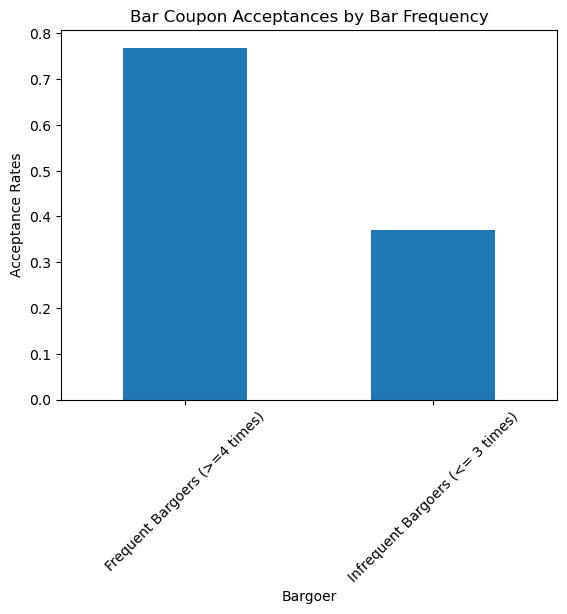

In [155]:

three_or_fewer = bar_coupon_data[(bar_coupon_data['Bar'].isin(['never', 'less1', '1~3']))]
bar_regular = bar_coupon_data[(bar_coupon_data['Bar'].isin(['gt8', '4~8']))]

print(three_or_fewer[['Y']].sum())
print(bar_regular[['Y']].sum())

bar_frequency_labels = bar_coupon_data['Bar'].isin(['never', 'less1', '1~3']).map({
    True: 'Infrequent Bargoers (<= 3 times)',
    False: 'Frequent Bargoers (>=4 times)'
})

bar_coupon_data.groupby(bar_frequency_labels)['Y'].mean().plot(kind='bar')

# acceptance_rate.plot(kind='bar')

plt.title('Bar Coupon Acceptances by Bar Frequency')
plt.ylabel('Acceptance Rates')
plt.xlabel('Bargoer')
plt.xticks(rotation=45)

plt.savefig('./images/bar_coupon_acceptances_by_bar_frequency.png')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


whether customer is driver
812
whether customer is over 25
1493
sum of drivers over 25
Driver Over 25    238
Everyone Else     581
Name: Y, dtype: int64


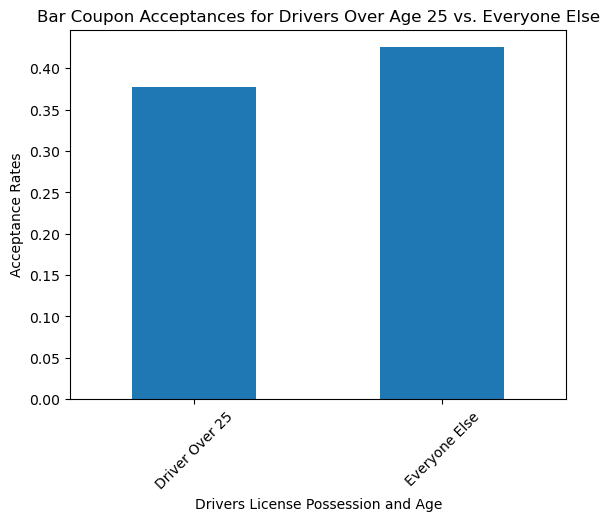

In [ ]:
data_with_transformed_age = bar_coupon_data

data_with_transformed_age['age'] = data['age'].replace({
  'below21': '20',
  '50plus': '50'
}).astype(int)

## is a driver if 
is_driver = (data_with_transformed_age['car'].notna() | data_with_transformed_age['passanger'].isin(['Friend(s)', 'Kid(s)', 'Partner'])) 

print('whether customer is driver')
print(is_driver.sum())

is_over_25 = data_with_transformed_age['age'] > 25

print('whether customer is over 25')
print(is_over_25.sum())

is_driver_over_25 = (is_driver & is_over_25).map({
  True: "Driver Over 25",
  False: "Everyone Else"
})

print('sum of drivers over 25')
print(data_with_transformed_age.groupby(is_driver_over_25)['Y'].sum())

data_with_transformed_age.groupby(is_driver_over_25)['Y'].mean().plot(kind='bar')

# acceptance_rate.plot(kind='bar')

plt.title('Bar Coupon Acceptances for Drivers Over Age 25 vs. Everyone Else')
plt.ylabel('Acceptance Rates')
plt.xlabel('Drivers License Possession and Age')
plt.xticks(rotation=45)

plt.savefig('./images/bar_coupon_acceptances_by_license_and_age.png')
plt.show()




5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


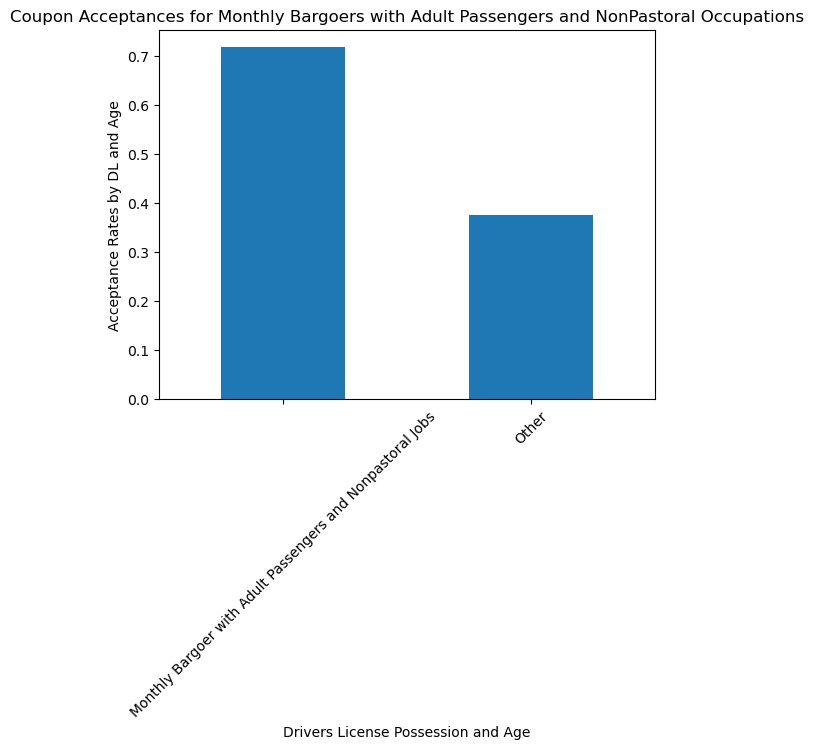

In [ ]:
bar_data_wo_nulls = data_with_transformed_age.dropna(subset=['Bar'])

monthly_bargoer = bar_data_wo_nulls['Bar'].isin(['1~3', 'gt8', '4~8'])

with_adult_passenger = bar_data_wo_nulls['passanger'].isin(['Friend(s)', 'Partner'])

non_natural_occupations = ~bar_data_wo_nulls['occupation'].isin(['Farming Fishing & Forestry'])

monthly_bargoer_with_adult_passengers_and_nonpastoral_jobs = (monthly_bargoer & with_adult_passenger & non_natural_occupations).map({
  True: 'Monthly Bargoer with Adult Passengers and Nonpastoral Jobs',
  False: 'Other'
})

bar_data_wo_nulls.groupby(monthly_bargoer_with_adult_passengers_and_nonpastoral_jobs)['Y'].mean().plot(kind='bar')

plt.title('Coupon Acceptances for Monthly Bargoers with Adult Passengers and Nonpastoral Occupations')
plt.ylabel('Acceptance Rates by DL and Age')
plt.xlabel('Drivers License Possession and Age')
plt.xticks(rotation=45)

plt.savefig('./images/bar_coupon_acceptances_for_bargoers_with_adult_passengers_and_nonpastoral_occupations.png')
plt.show()


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



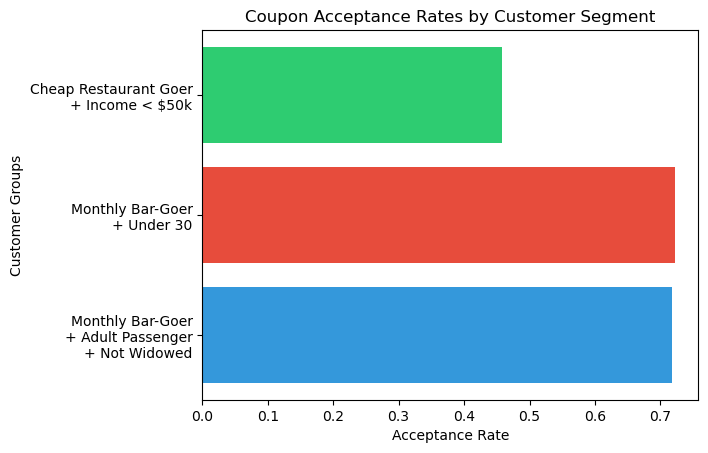

In [ ]:
not_widowed = ~bar_data_wo_nulls['maritalStatus'].isin(['Widowed'])

under_30 = bar_data_wo_nulls['age'] < 30

cheap_restaurant_goer = bar_data_wo_nulls['RestaurantLessThan20'].isin(['4~8', 'gt8'])

less_than_50k = bar_data_wo_nulls['income'].isin(['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500'])

group_1 = monthly_bargoer & with_adult_passenger & not_widowed

group_2 = monthly_bargoer & under_30

group_3 = cheap_restaurant_goer & less_than_50k

# Calculate acceptance rates
groups_data = {
    'Monthly Bar-Goer\n+ Adult Passenger\n+ Not Widowed': {
        'mask': group_1,
        'acceptance_rate': data_with_transformed_age[group_1]['Y'].mean(),
        'count': group_1.sum(),
        'accepted': data_with_transformed_age[group_1]['Y'].sum()
    },
    'Monthly Bar-Goer\n+ Under 30': {
        'mask': group_2,
        'acceptance_rate': data_with_transformed_age[group_2]['Y'].mean(),
        'count': group_2.sum(),
        'accepted': data_with_transformed_age[group_2]['Y'].sum()
    },
    'Cheap Restaurant Goer\n+ Income < $50k': {
        'mask': group_3,
        'acceptance_rate': data_with_transformed_age[group_3]['Y'].mean(),
        'count': group_3.sum(),
        'accepted': data_with_transformed_age[group_3]['Y'].sum()
    }
}

# Create DataFrame for easy plotting
results_df = pd.DataFrame({
    'group': list(groups_data.keys()),
    'acceptance_rate': [v['acceptance_rate'] for v in groups_data.values()],
    'count': [v['count'] for v in groups_data.values()],
    'accepted': [v['accepted'] for v in groups_data.values()]
})

plt.barh(results_df['group'], results_df['acceptance_rate'], color=['#3498db', '#e74c3c', '#2ecc71'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Customer Groups')
plt.title('Coupon Acceptance Rates by Customer Segment')

plt.savefig('./images/bar_group_acceptance_comparison.png')
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [162]:
print("Per bar coupons, people going out with other adults and traditionally higher paying jobs are more likely to take advantage of these coupons than those who might have kid passengers or pastoral jobs.")

Per bar coupons, people going out with other adults and traditionally higher paying jobs are more likely to take advantage of these coupons than those who might have kid passengers or pastoral jobs.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  